In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv")

In [3]:
data.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
data.shape

(120, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [6]:
data.columns

Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [7]:
data.drop(columns = "Patient Number",inplace = True)
data.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [8]:
np.unique(data['Sadness'])

array(['Most-Often', 'Seldom', 'Sometimes', 'Usually'], dtype=object)

In [9]:
np.unique(data['Euphoric'])

array(['Most-Often', 'Seldom', 'Sometimes', 'Usually'], dtype=object)

In [10]:
np.unique(data['Exhausted'])

array(['Most-Often', 'Seldom', 'Sometimes', 'Usually'], dtype=object)

In [11]:
np.unique(data['Sleep dissorder'])

array(['Most-Often', 'Seldom', 'Sometimes', 'Usually'], dtype=object)

In [12]:
data = data.replace('Most-Often',1)
data = data.replace('Seldom',2)
data = data.replace('Sometimes',3)
data= data.replace('Usually',4)
data.head()

/tmp/ipykernel_33/2265892443.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('Usually',4)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,4,2,4,3,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,3,1,3,3,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,4,2,4,1,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,4,4,3,3,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [13]:
data = data.replace('YES',1)
data= data.replace('NO',0)
data.head()

/tmp/ipykernel_33/3915293687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('NO',0)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,1,YES,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [16]:
data['Suicidal thoughts'][0] = 1

/tmp/ipykernel_33/2526540103.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Suicidal thoughts'][0] = 1
/tmp/ipykernel_33/2526540103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [17]:
data.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [18]:
np.unique(data['Expert Diagnose'])

array(['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'],
      dtype=object)

In [19]:
data = data.replace('Bipolar Type-1',1)
data = data.replace('Bipolar Type-2',2)
data = data.replace('Depression',3)
data= data.replace('Normal',4)
data.head()

/tmp/ipykernel_33/3521386969.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('Normal',4)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,4


In [22]:
np.unique(data['Optimisim'])

array(['1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10',
       '6 From 10', '7 From 10', '8 From 10', '9 From 10'], dtype=object)

In [23]:
data = data.replace('1 From 10',1)
data = data.replace('2 From 10',2)
data = data.replace('3 From 10',3)
data= data.replace('4 From 10',4)
data = data.replace('5 From 10',5)
data = data.replace('6 From 10',5)
data = data.replace('7 From 10',7)
data= data.replace('8 From 10',8)
data= data.replace('9 From 10',9)
data.head()

/tmp/ipykernel_33/1664657558.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('8 From 10',8)
/tmp/ipykernel_33/1664657558.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('9 From 10',9)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,5,5,7,1
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5,5,5,4


In [26]:
count = data.groupby(['Optimisim']).count()
count

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Expert Diagnose
Optimisim,,,,,,,,,,,,,,,,,
1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
3,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
4,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
5,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [28]:
data.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,5,5,7,1
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5,5,5,4


<Axes: xlabel='Expert Diagnose', ylabel='Sadness'>

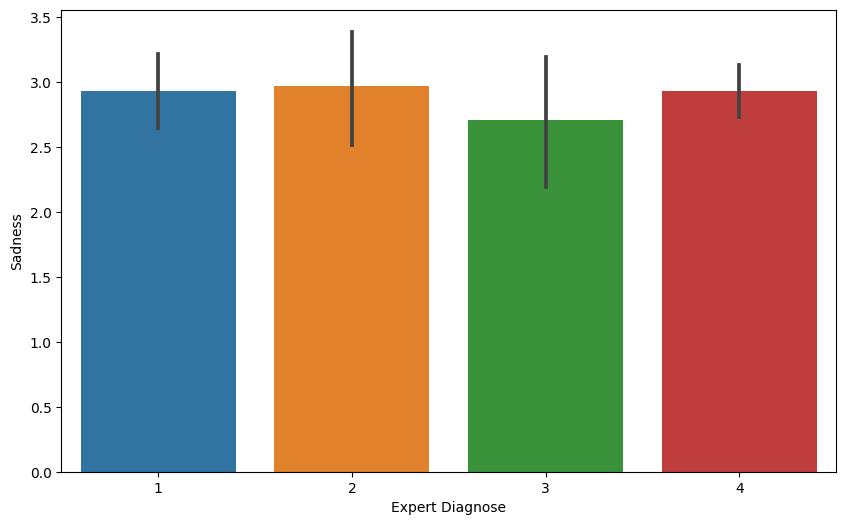

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Sadness', data = data)

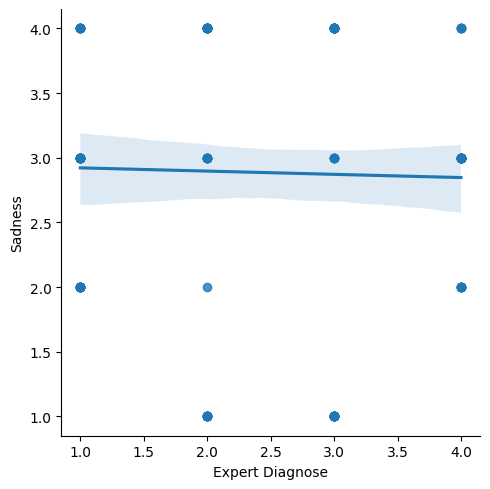

In [30]:
sns.lmplot(x='Expert Diagnose', y='Sadness', data=data)

<Axes: xlabel='Expert Diagnose', ylabel='Aggressive Response'>

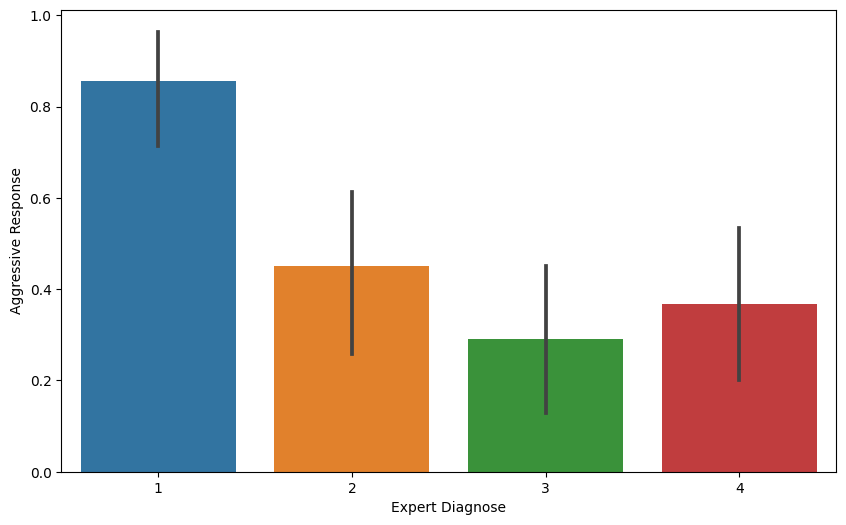

In [31]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Aggressive Response', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Nervous Break-down'>

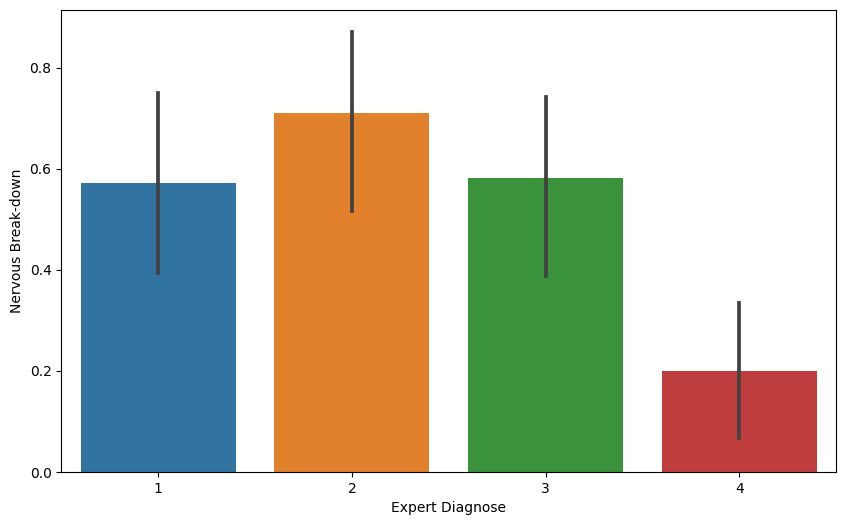

In [32]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Nervous Break-down', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Admit Mistakes'>

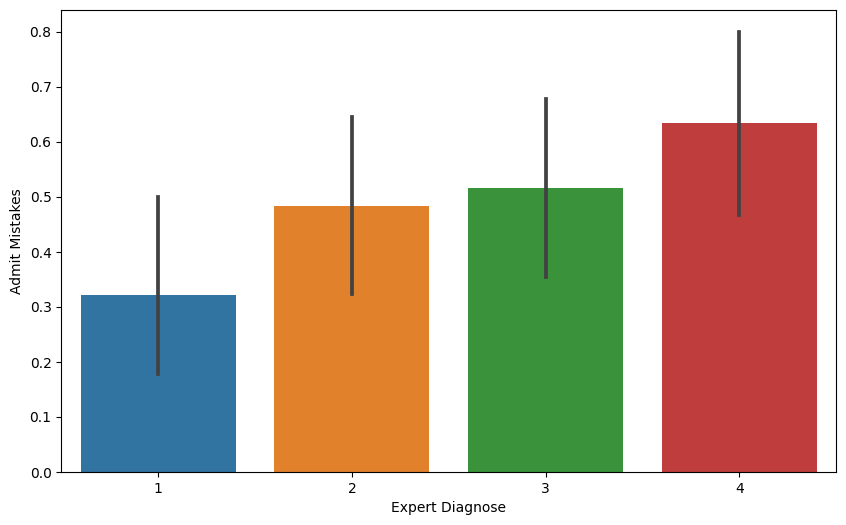

In [33]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Admit Mistakes', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Overthinking'>

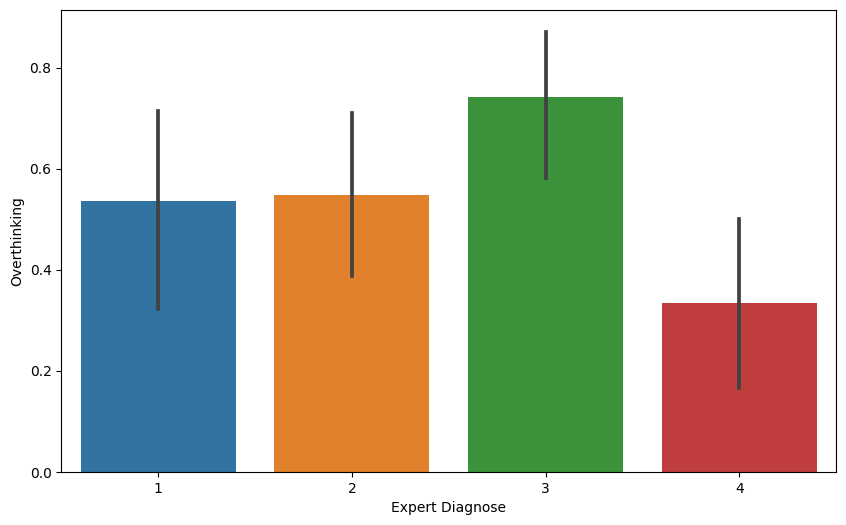

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Overthinking', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Sexual Activity'>

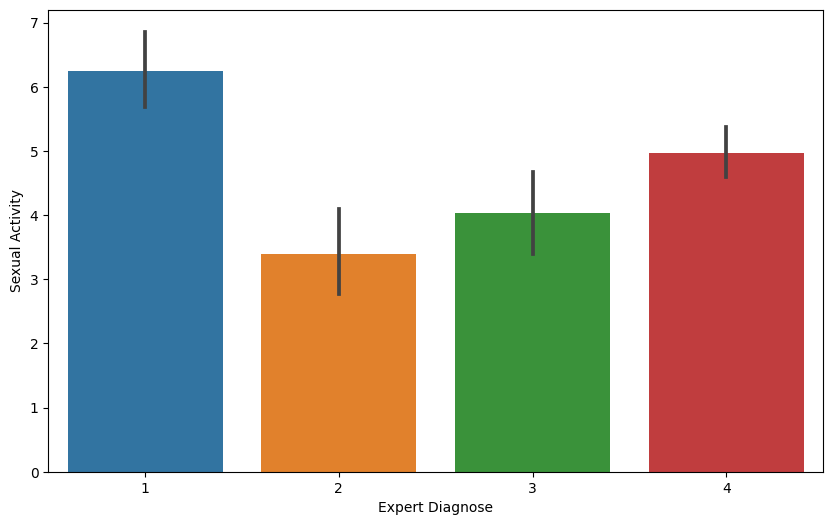

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Sexual Activity', data = data)

In [36]:
data.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,5,5,7,1
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5,5,5,4


<Axes: xlabel='Expert Diagnose', ylabel='Suicidal thoughts'>

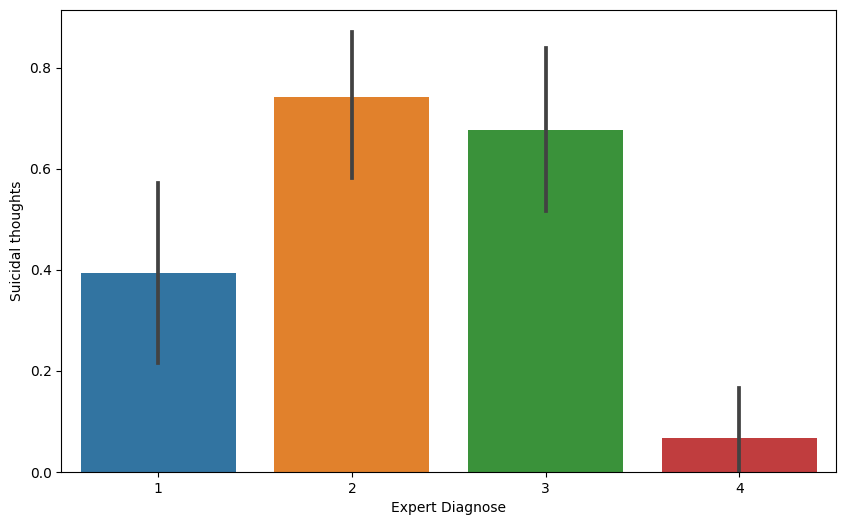

In [37]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Suicidal thoughts', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Mood Swing'>

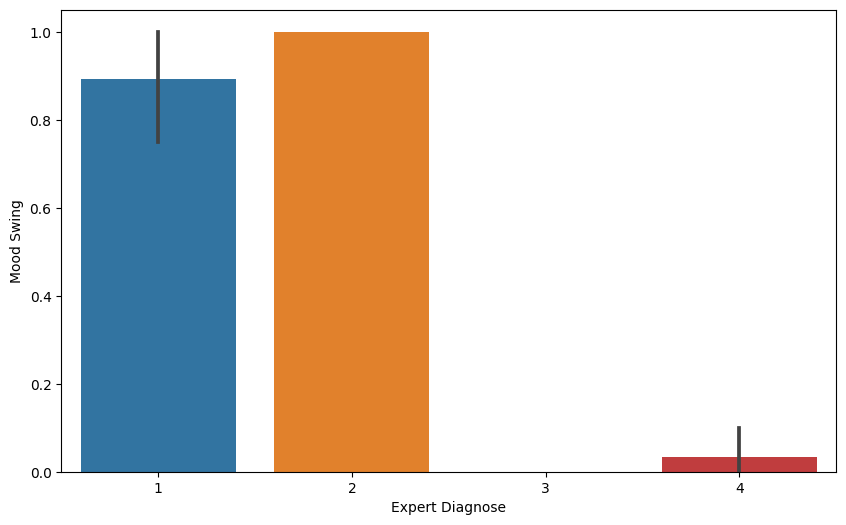

In [38]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Mood Swing', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Authority Respect'>

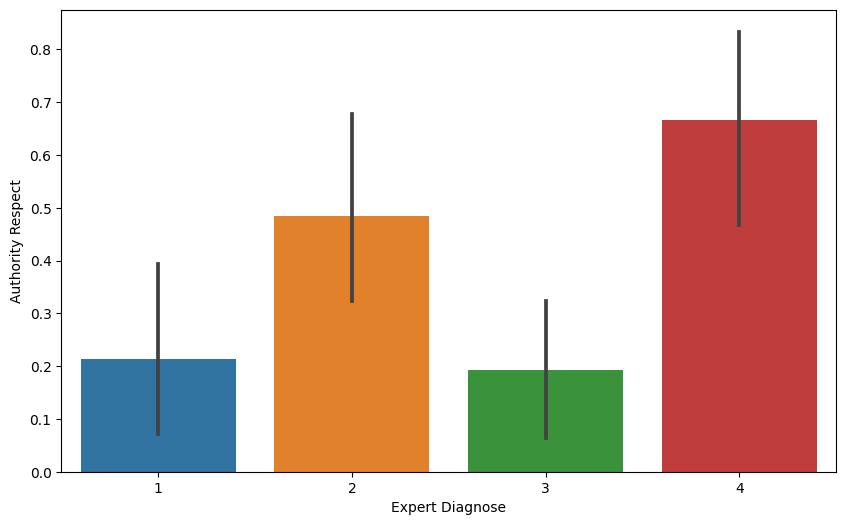

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Authority Respect', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Optimisim'>

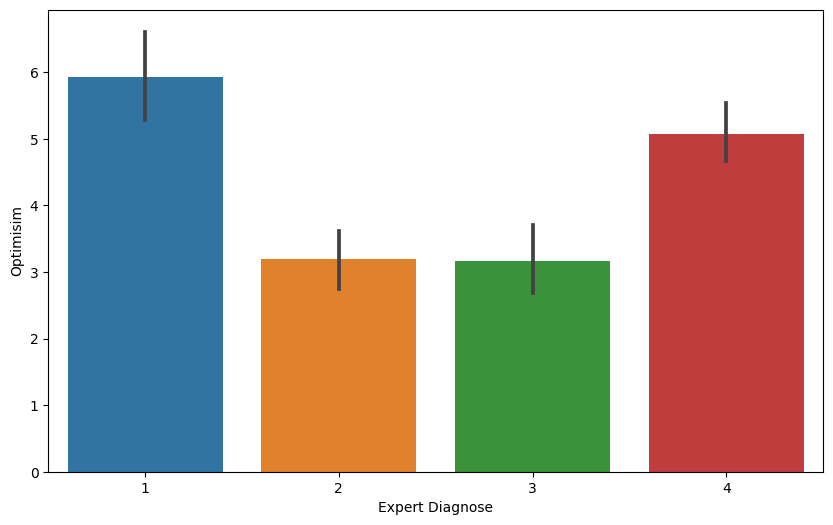

In [40]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Optimisim', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Concentration'>

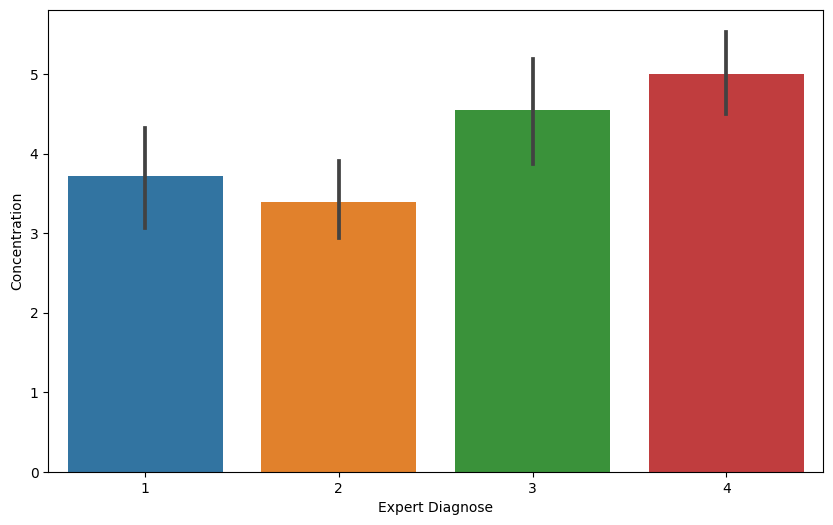

In [42]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Concentration', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Ignore & Move-On'>

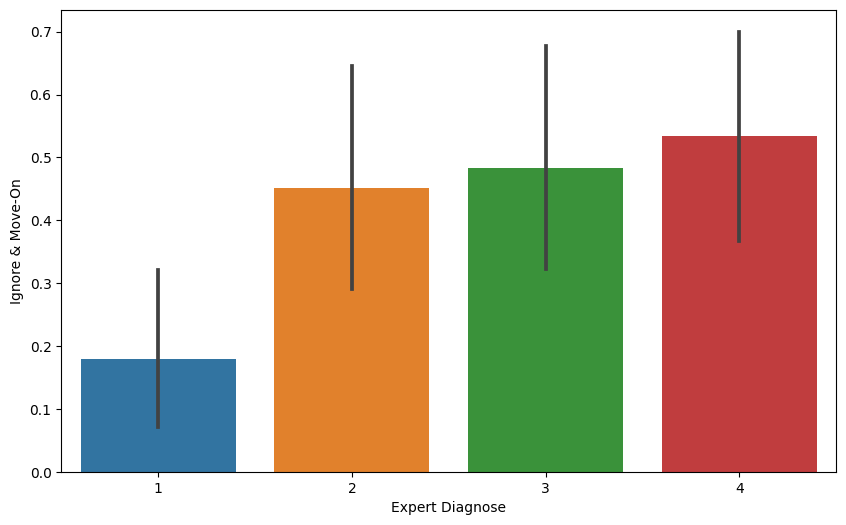

In [43]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Ignore & Move-On', data = data)

<Axes: xlabel='Expert Diagnose', ylabel='Anorxia'>

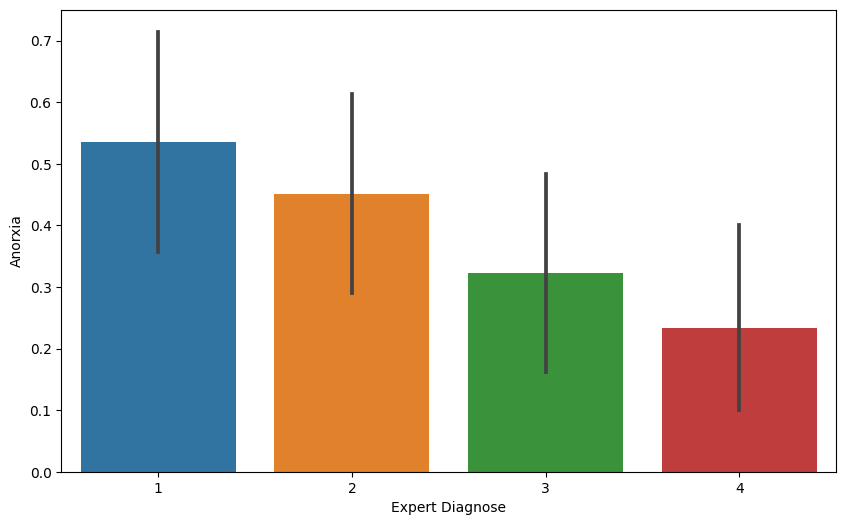

In [44]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Expert Diagnose', y = 'Anorxia', data = data)

In [46]:
X = data.drop('Expert Diagnose',axis=1)
Y = data['Expert Diagnose']
X.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,5,5,7
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3,2,2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5,5,5


In [47]:
Y.head()

0    2
1    3
2    1
3    2
4    4
Name: Expert Diagnose, dtype: int64

In [48]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle=True)

In [49]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [50]:
predict_test = model.predict(X_test)
print('Target on test data',predict_test)

Target on test data [2 2 3 3 4 4 3 2 3 4 2 2 2 3 4 2 2 4 4 1 2 4 2 1 3 4 2 4 4 1 2 2 2 2 2 3]


In [51]:
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.75


In [52]:
cnf_matrix = metrics.confusion_matrix(y_test, predict_test)
cnf_matrix

array([[ 3,  4,  1,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  5,  2],
       [ 0,  1,  1,  8]])

In [53]:
predict_train = model.predict(X_train)

accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8095238095238095


In [54]:
cnf_matrix = metrics.confusion_matrix(y_train,predict_train)
cnf_matrix

array([[ 5, 13,  1,  1],
       [ 0, 20,  0,  0],
       [ 0,  0, 24,  0],
       [ 0,  0,  1, 19]])